In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# **Import Required Libraries**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.sparse import issparse
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [63]:
train_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [64]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


**Understanding the Structure of the Provided Data**
# - Checking the shape of the datasets
# - Listing the columns and their data types
# - Identifying the target variable

In [65]:
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

print("\nColumns in training data:")
print(train_data.info())


print("\nMissing values in training data:")
print(train_data.isnull().sum())

Training data shape: (100000, 76)
Test data shape: (10000, 75)

Columns in training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  Num

# **Performing the Exploratory Data Analysis (EDA)**
 **Let's explore the data by analyzing:**
 - Summary statistics
 - Distributions of numerical variables
 - Counts of categorical variables
 - Target variable distribution

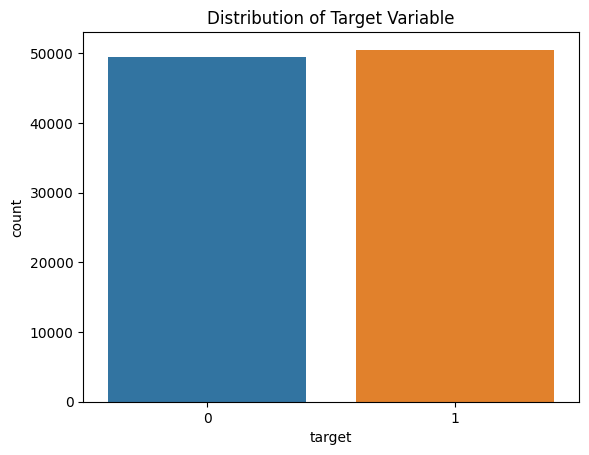

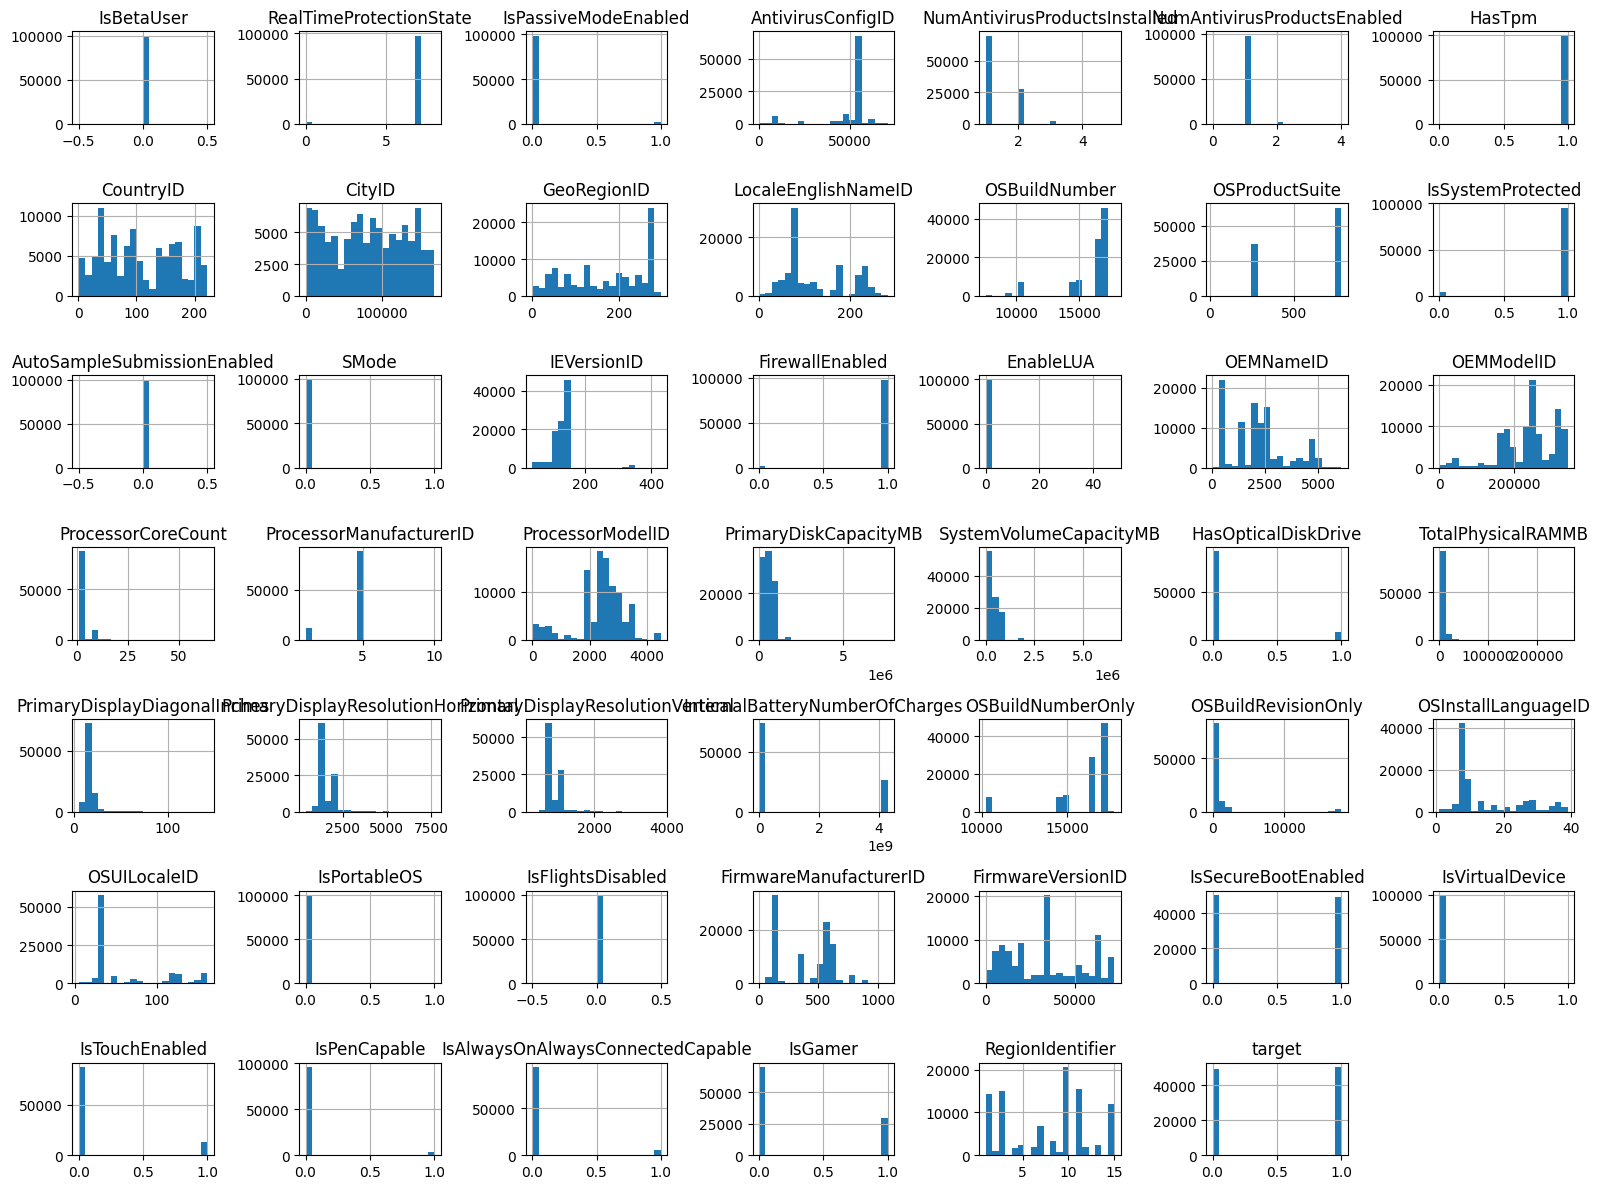

MachineID: 99835 unique values
ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
SignatureVersion: 2735 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
NumericOSVersion: 221 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values
DateAS: 2695 unique values
DateOS: 112 unique values


In [66]:
# For Summary statistics
train_data.describe()

# Distribution of variable
sns.countplot(x='target', data=train_data)
plt.title("Distribution of Target Variable")
plt.show()

num_features = train_data.select_dtypes(include=[np.number]).columns
train_data[num_features].hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()

cat_features = train_data.select_dtypes(include=['object']).columns
for col in cat_features:
    print(f"{col}: {train_data[col].nunique()} unique values")


*The dataset contains both numerical and categorical features, with a balanced distribution of the target variable. Histograms show that some numerical features are skewed, while others have a more uniform spread. Certain categorical features have only a few unique values, indicating potential for encoding. The presence of features with high cardinality suggests further preprocessing may be required. Additionally, some variables exhibit clustering around specific values, which may indicate underlying patterns or biases in the data. Further analysis, including correlation checks and outlier detection, could help refine feature selection and improve model performance.*

In [67]:
# Display basic statistics
print("Train Dataset Statistics:")
print(train_data.describe(include='all'))

print("\nTarget Value Distribution:")
print(train_data['target'].value_counts(normalize=True))

# Missing values check
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

print("\nMissing Values in Train Data:")
print(missing_train[missing_train > 0])

print("\nMissing Values in Test Data:")
print(missing_test[missing_test > 0])


Train Dataset Statistics:
                               MachineID   ProductName EngineVersion  \
count                             100000        100000        100000   
unique                             99835             2            37   
top     8e0523438a5ca48323f50b2c47f6d31a  win8defender   1.1.15200.1   
freq                                   2         99771         45219   
mean                                 NaN           NaN           NaN   
std                                  NaN           NaN           NaN   
min                                  NaN           NaN           NaN   
25%                                  NaN           NaN           NaN   
50%                                  NaN           NaN           NaN   
75%                                  NaN           NaN           NaN   
max                                  NaN           NaN           NaN   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
count            100000     

**Some observations we can draw from the above output is:-**

Target Distribution: The dataset is well-balanced, with approximately 50.5% of samples labeled as 1 and 49.5% as 0, minimizing class imbalance concerns.

Categorical Variables: Features like ProductName, EngineVersion, and AppVersion have a small number of unique values, indicating they can be efficiently encoded. However, some like SignatureVersion have high cardinality, requiring careful preprocessing.

Numerical Features: Features such as ProcessorCoreCount, TotalPhysicalRAMMB, and PrimaryDiskCapacityMB vary widely, which might require normalization or scaling.

Missing Values: Some features, including RealTimeProtectionState, CityID, and IsGamer, have missing values, with SMode showing the highest missing count (981 in training data). Imputation or removal strategies may be needed.

Binary Features: Variables like IsSecureBootEnabled, IsTouchEnabled, and IsGamer are binary, potentially useful for feature selection.

Date Features: DateAS and DateOS are present, which could be used to derive time-based insights such as system age or update frequency.

Outliers & Skewness: Some numerical features, like AntivirusConfigID and NumAntivirusProductsInstalled, show high variation, indicating possible outliers or skewness that may impact modeling.

**#Missing Value Analysis**

Missing Value Analysis:
                                                           Feature  \
SMode                                                        SMode   
CityID                                                      CityID   
RegionIdentifier                                  RegionIdentifier   
IsGamer                                                    IsGamer   
InternalBatteryNumberOfCharges      InternalBatteryNumberOfCharges   
FirmwareManufacturerID                      FirmwareManufacturerID   
FirmwareVersionID                                FirmwareVersionID   
IsFlightsDisabled                                IsFlightsDisabled   
OEMModelID                                              OEMModelID   
OEMNameID                                                OEMNameID   
FirewallEnabled                                    FirewallEnabled   
TotalPhysicalRAMMB                              TotalPhysicalRAMMB   
IsAlwaysOnAlwaysConnectedCapable  IsAlwaysOnAlwaysConnectedCapable

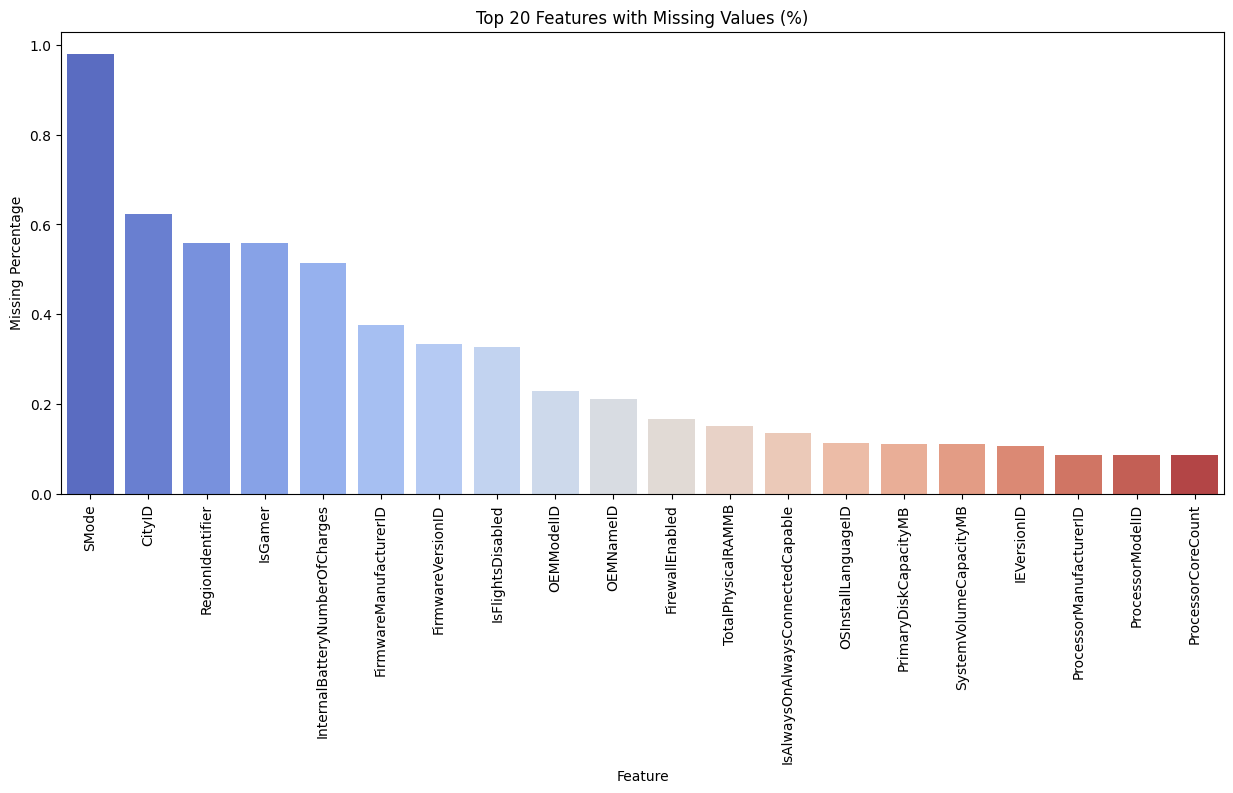

In [68]:
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100
missing_df = pd.DataFrame({
    'Feature': train_data.columns,
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print("Missing Value Analysis:")
print(missing_df.head(20))  # Display features with the highest missing values

plt.figure(figsize=(15, 6))
sns.barplot(x=missing_df['Feature'][:20], y=missing_df['Missing Percentage'][:20], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 20 Features with Missing Values (%)")
plt.show()

The dataset contains notable missing values, with SMode having the highest at 0.98%, followed by CityID (0.62%) and RegionIdentifier (0.56%), which could impact location-based insights. The IsGamer feature (0.56%) and InternalBatteryNumberOfCharges (0.51%) also show significant gaps, possibly affecting user behavior analysis. Hardware-related attributes such as FirmwareManufacturerID (0.38%), FirmwareVersionID (0.33%), and processor-related fields (around 0.085%) indicate some inconsistencies in system information. Additionally, memory and storage features, including TotalPhysicalRAMMB (0.15%) and PrimaryDiskCapacityMB (0.11%), exhibit minor missing values, which may require imputation using median values. Security and system settings, such as FirewallEnabled (0.166%) and IsFlightsDisabled (0.33%), also have gaps, potentially influencing security-related insights. Proper handling of these missing values, such as imputation or feature engineering, will be crucial for maintaining data integrity and model performance.

**Target Class Imbalance Check**

In [69]:
# target_counts = train_data['target'].value_counts(normalize=True)
# print("\nTarget Class Distribution (Percentage):")
# print(target_counts)

# plt.figure(figsize=(6, 6))
# target_counts.plot.pie(autopct='%1.1f%%', labels=['No Malware', 'Malware'], startangle=90, colors=['#4CAF50', '#FF5722'])
# plt.title("Target Variable Class Distribution")
# plt.ylabel("")
# plt.show()

The target variable in the dataset is nearly balanced, with 50.52% of instances labeled as "Malware" (1) and 49.48% as "No Malware" (0). This indicates a well-distributed dataset, reducing concerns about class imbalance, which could otherwise impact model performance.

**# Distribution of numerical variables**

In [70]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# numerical_features = train_data.select_dtypes(include=np.number).columns.tolist()
# numerical_features.remove('target')  # Exclude target for now
# for col in numerical_features:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(train_data[col], kde=True, bins=30, color='blue')
#     plt.title(f'Distribution of {col}')
#     plt.show()

The distribution analysis of numerical features reveals a diverse range of patterns across different attributes. Some features exhibit a normal distribution, while others are skewed or have multiple peaks, suggesting the presence of categorical-like behavior within numerical columns. Features such as RealTimeProtectionState, NumAntivirusProductsInstalled, and ProcessorCoreCount show distinct peaks, indicating that specific values dominate. Certain features, like TotalPhysicalRAMMB and PrimaryDiskCapacityMB, have long-tailed distributions, highlighting potential outliers or varying system configurations among the data points. Additionally, binary features such as IsSecureBootEnabled and IsGamer display clear bimodal distributions, reinforcing their categorical nature despite being stored as numerical values. The presence of skewed and multimodal distributions suggests the need for potential feature transformations or normalization techniques to improve model performance.

**Categorical Features and Distrubutions**

In [71]:
# import matplotlib.pyplot as plt

# def limit_categories(data, column, top_n=10):
#     top_categories = data[column].value_counts().nlargest(top_n).index
#     return data[column].apply(lambda x: x if x in top_categories else 'Other')

# categorical_features = train_data.select_dtypes(include='object').columns.tolist()

# categorical_features = [col for col in categorical_features if col != 'MachineID' and col != 'DateOS' and col != 'DateAS']

# high_cardinality_features = ['NumericOSVersion', 'OSBuildLab', 'SignatureVersion', 'AppVersion']
# for col in high_cardinality_features:
#     if col in train_data.columns:
#         train_data[col] = limit_categories(train_data, col, top_n=10)


# for col in categorical_features:
#     plt.figure(figsize=(10, 6))
#     # Sort categories by count for better visualization
#     order = train_data[col].value_counts().index
#     sns.countplot(y=train_data[col], order=order, palette="viridis")
#     plt.title(f'Count of {col}')
#     plt.xlabel('Count')
#     plt.ylabel(col)
#     plt.show()

In [72]:
# import warnings
# warnings.filterwarnings('ignore')

# def limit_categories(data, column, top_n=10):
#     top_categories = data[column].value_counts().nlargest(top_n).index
#     return data[column].apply(lambda x: x if x in top_categories else 'Other')

# categorical_features = train_data.select_dtypes(include=['object', 'category']).columns
# categorical_features = [col for col in categorical_features if col not in ['MachineID', 'DateOS', 'DateAS']]
# print("Categorical features:", categorical_features)  # Debug print

# high_cardinality_features = ['NumericOSVersion', 'OSBuildLab', 'SignatureVersion', 'AppVersion']
# for col in high_cardinality_features:
#     if col in train_data.columns:
#        train_data[col] = limit_categories(train_data, col, top_n=10)

# for col in categorical_features:
#     plt.figure(figsize=(10, 6))
#     # Sort categories by count for better visualization
#     order = train_data[col].value_counts().index
#     sns.countplot(y=train_data[col], order=order, palette="viridis")
#     plt.title(f'Count of {col}')
#     plt.xlabel('Count')
#     plt.ylabel(col)
#     plt.show()

The categorical feature analysis highlights distinct patterns and varying distributions across different attributes. Features with low cardinality, such as IsGamer and FirewallEnabled, display a clear distinction between categories, often dominated by one or two values. On the other hand, high-cardinality features like NumericOSVersion, OSBuildLab, SignatureVersion, and AppVersion were grouped into the top 10 most frequent categories, with all other values categorized as "Other" to simplify visualization and analysis.

Certain features exhibit a strong imbalance, where a single category heavily dominates, as seen in SMode and RegionIdentifier. Meanwhile, other features, like OEMModelID and FirmwareManufacturerID, show a more even spread across multiple categories, indicating a diverse dataset with varying device configurations. The presence of imbalanced categorical distributions suggests that some categories may need encoding techniques such as target encoding or frequency-based binning to optimize model performance.

# Data Visualization
**Visualization allows us to uncover patterns and relationships in the data. Here, we’ll visualize the target distribution and analyze a few key features.**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)


print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())


Missing Values in Train Data:
MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64


***Coorelaton Heatmap***

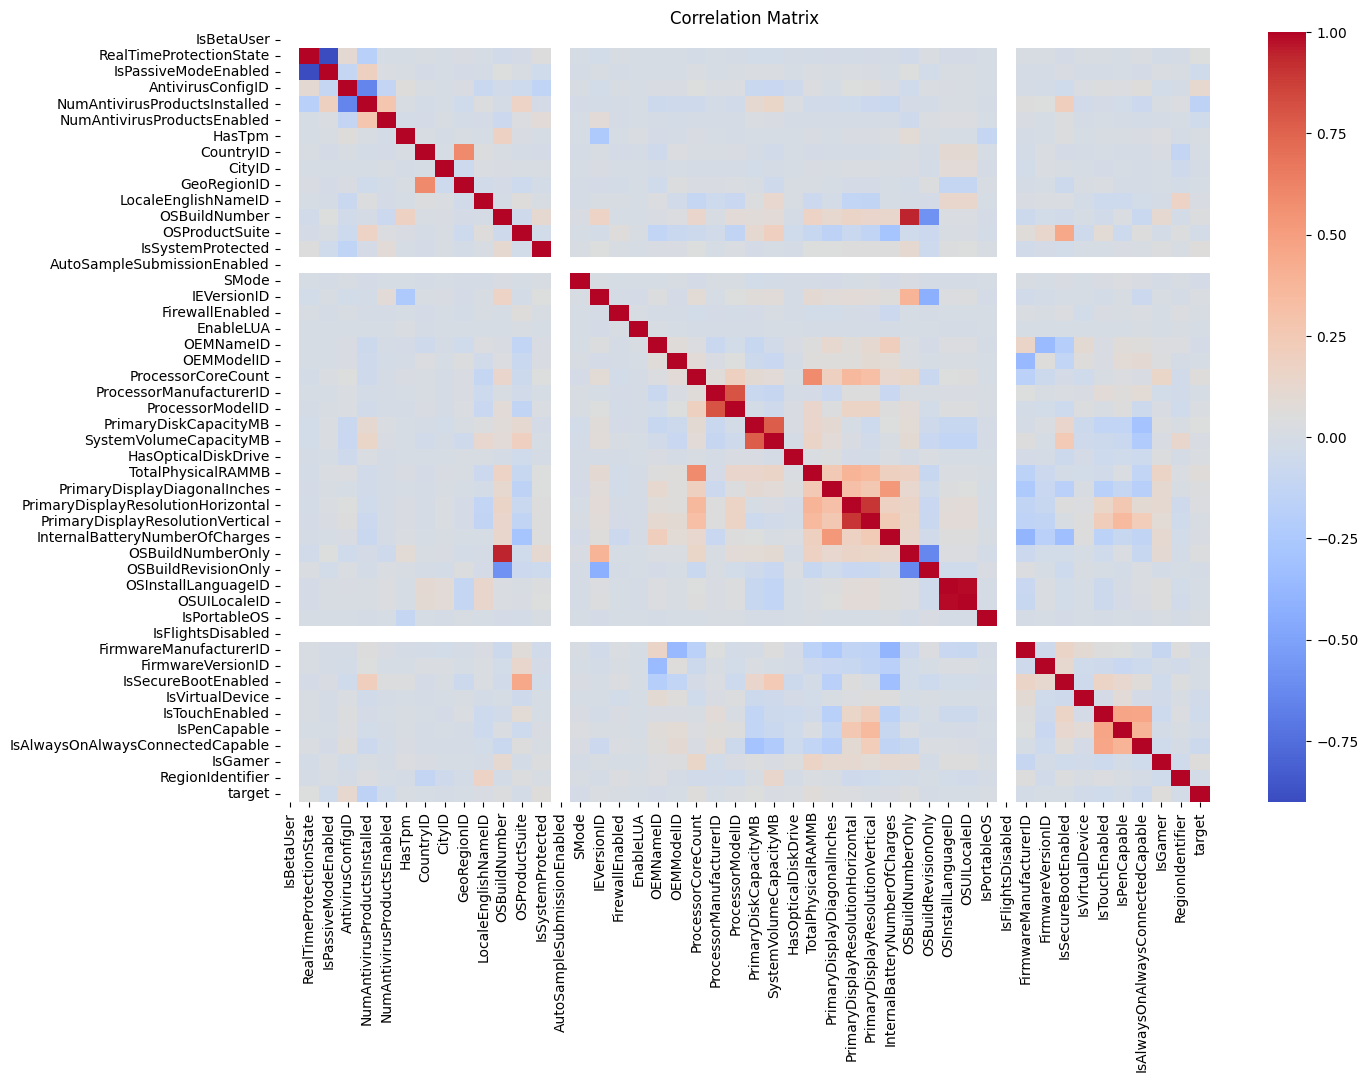

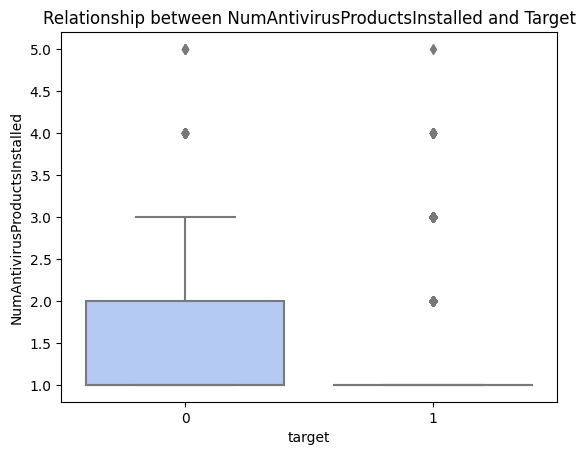

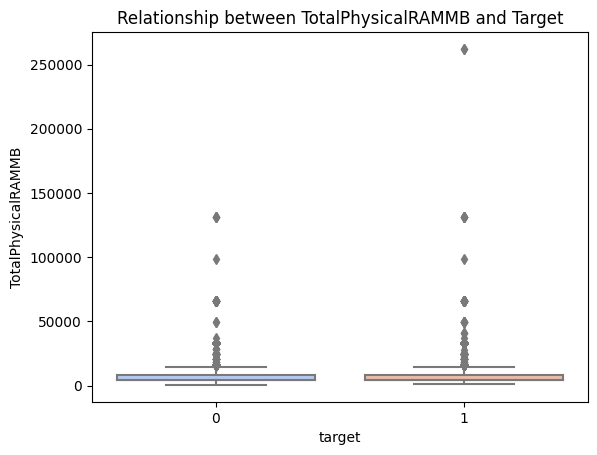

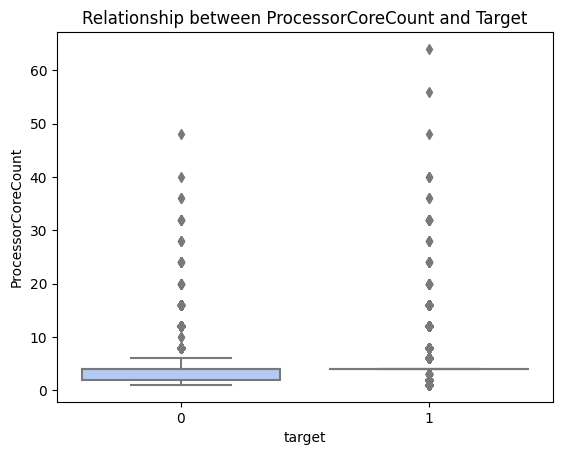

In [74]:

numeric_data = train_data.select_dtypes(include=[np.number])

# Correlation matrix for numerical features
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

columns_to_plot = ['NumAntivirusProductsInstalled', 'TotalPhysicalRAMMB', 'ProcessorCoreCount']
for col in columns_to_plot:
    if col in numeric_data.columns:
        sns.boxplot(x='target', y=train_data[col], data=train_data, palette='coolwarm')
        plt.title(f'Relationship between {col} and Target')
        plt.show()
    else:
        print(f"Column {col} is not numeric and will be skipped.")


The correlation matrix provides insights into relationships between numerical features in the dataset. The heatmap reveals strong correlations between some variables, indicated by darker red regions, suggesting redundancy and potential multicollinearity. Conversely, many features exhibit weak or no correlation with each other, as seen in the lighter regions of the heatmap.

In addition, box plots depicting the relationship between specific numerical features and the target variable highlight key differences in distributions. For example, NumAntivirusProductsInstalled, TotalPhysicalRAMMB, and ProcessorCoreCount show variations across malware and non-malware cases. These variations suggest that certain hardware and security-related features may play a role in malware detection, making them potentially valuable predictors for a machine learning model.

***Unique Value Count***

In [75]:
for column in train_data.columns:
    print(f"Column: {column}")
    print(f"Unique Value Count: {train_data[column].nunique()}")
    print("-" * 50)

Column: MachineID
Unique Value Count: 99835
--------------------------------------------------
Column: ProductName
Unique Value Count: 2
--------------------------------------------------
Column: EngineVersion
Unique Value Count: 37
--------------------------------------------------
Column: AppVersion
Unique Value Count: 69
--------------------------------------------------
Column: SignatureVersion
Unique Value Count: 2735
--------------------------------------------------
Column: IsBetaUser
Unique Value Count: 1
--------------------------------------------------
Column: RealTimeProtectionState
Unique Value Count: 6
--------------------------------------------------
Column: IsPassiveModeEnabled
Unique Value Count: 2
--------------------------------------------------
Column: AntivirusConfigID
Unique Value Count: 1976
--------------------------------------------------
Column: NumAntivirusProductsInstalled
Unique Value Count: 5
--------------------------------------------------
Column: Nu

# **Data Cleaning and Preprocessing**
**Handle missing values, encode categorical variables, and standardize numerical features to prepare the data for modeling.**

In [76]:
columns_to_drop = [
    # Constant columns
    "IsBetaUser", "AutoSampleSubmissionEnabled", "IsFlightsDisabled",
    
    # High cardinality columns
    "MachineID", "CityID", "OEMModelID", "SystemVolumeCapacityMB", 
    "FirmwareVersionID", "SignatureVersion", "AntivirusConfigID",
    "InternalBatteryNumberOfCharges", "NumericOSVersion", "DateOS", "DateAS"
    

]

train_data_drop = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data_drop = test_data.drop(columns=columns_to_drop, errors='ignore')

print(f"Columns dropped: {columns_to_drop}")
print(f"Train dataset shape: {train_data_drop.shape}")
print(f"Test dataset shape: {test_data_drop.shape}")

Columns dropped: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID', 'CityID', 'OEMModelID', 'SystemVolumeCapacityMB', 'FirmwareVersionID', 'SignatureVersion', 'AntivirusConfigID', 'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'DateOS', 'DateAS']
Train dataset shape: (100000, 62)
Test dataset shape: (10000, 61)


*The script removes specific columns from both the training and test datasets to improve data quality and reduce redundancy. The dropped columns include constant columns such as "IsBetaUser", "AutoSampleSubmissionEnabled", and "IsFlightsDisabled", as well as high-cardinality columns like "MachineID", "CityID", "OEMModelID", "SystemVolumeCapacityMB", "FirmwareVersionID", "SignatureVersion", "AntivirusConfigID", "InternalBatteryNumberOfCharges", "NumericOSVersion", "DateOS", and "DateAS". After dropping these columns, the training dataset contains 62 columns and 100,000 rows, while the test dataset retains 61 columns with 10,000 rows.*

In [77]:
# missing_train = train_data.isnull().sum()[train_data.isnull().sum() > 0]
# print("Columns with missing values in training data:\n", missing_train)

# missing_test = test_data.isnull().sum()[test_data.isnull().sum() > 0]
# print("Columns with missing values in test data:\n", missing_test)


**FEATURE ANALYSIS**

In [78]:
categorical_features = train_data_drop.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    print(f"{col}: {train_data_drop[col].nunique()} unique values")


ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values


In [79]:
# Binary encoding for features with 2 unique values
binary_features = ['ProductName', 'DeviceFamily']
for col in binary_features:
    train_data_drop[col] = train_data_drop[col].map({val: idx for idx, val in enumerate(train_data[col].unique())})
    test_data_drop[col] = test_data_drop[col].map({val: idx for idx, val in enumerate(train_data[col].unique())})

# Check the transformation
print("Transformed Binary Features:\n", train_data_drop[binary_features].head())

Transformed Binary Features:
    ProductName  DeviceFamily
0            0             0
1            0             0
2            0             0
3            0             0
4            0             0


This script applies binary encoding to the features "ProductName" and "DeviceFamily", which contain only two unique values. It maps each unique value in these columns to either 0 or 1, ensuring a numerical representation suitable for machine learning models. The transformation is applied to both the training and test datasets using the unique values from the training set. Finally, the first few rows of the transformed binary features are printed to verify the encoding.

***One Hot Encoding***

In [80]:
one_hot_features = [
    'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease',
    'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture', 'SKUEditionName', 'OSInstallType',
    'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing'
]

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ohe_train = ohe.fit_transform(train_data_drop[one_hot_features])
ohe_test = ohe.transform(test_data_drop[one_hot_features])

ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(one_hot_features), index=train_data_drop.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(one_hot_features), index=test_data_drop.index)

train_data_new = pd.concat([train_data_drop.drop(columns=one_hot_features), ohe_train_df], axis=1)
test_data_new = pd.concat([test_data_drop.drop(columns=one_hot_features), ohe_test_df], axis=1)

print("One-hot encoding completed. Train shape:", train_data_new.shape, "Test shape:", test_data_new.shape)

One-hot encoding completed. Train shape: (100000, 116) Test shape: (10000, 115)


The script applies one-hot encoding to categorical features such as "PlatformType", "Processor", "OSVersion", "OsPlatformSubRelease", "PrimaryDiskType", "PowerPlatformRole", "OSArchitecture", "SKUEditionName", "OSInstallType", "AutoUpdateOptionsName", "OSGenuineState", "LicenseActivationChannel", and "FlightRing". Using the OneHotEncoder from sklearn, it converts these categorical variables into numerical form by creating binary columns for each unique category, dropping the first category to avoid multicollinearity. The transformation is first fitted on the training set and then applied to the test set, ensuring consistency. The encoded features are stored in new DataFrames and concatenated with the original datasets after dropping the original categorical columns. The final processed training dataset has a new shape, and the transformation is confirmed with a printed output.

***Frequency Encoding***

In [81]:
high_card_features = [
    'EngineVersion', 'AppVersion', 'OSBuildLab', 'MDC2FormFactor', 'ChassisType',
    'OSBranch', 'OSEdition', 'OSSkuFriendlyName'
]

def frequency_encode(df, feature):
    freq_map = df[feature].value_counts(normalize=True).to_dict()
    return df[feature].map(freq_map)

for feature in high_card_features:
    train_data_new[feature] = frequency_encode(train_data_drop, feature)
    test_data_new[feature] = test_data_drop[feature].map(train_data_drop[feature].value_counts(normalize=True))

test_data_new[feature] = test_data_new[feature].fillna(0) 

print("Frequency encoding completed. Train shape:", train_data_new.shape, "Test shape:", test_data_new.shape)

Frequency encoding completed. Train shape: (100000, 116) Test shape: (10000, 115)


The script applies frequency encoding to high-cardinality categorical features, including "EngineVersion", "AppVersion", "OSBuildLab", "MDC2FormFactor", "ChassisType", "OSBranch", "OSEdition", and "OSSkuFriendlyName". Frequency encoding replaces each unique category with its relative frequency in the dataset, reducing dimensionality while retaining valuable information. The encoding is derived from the training set and then applied to the test set to ensure consistency. Any unseen categories in the test set are assigned a default frequency of zero. After the transformation, the processed training and test datasets maintain their updated shapes, which are confirmed with a printed output.

In [82]:
scale_features = [
    col for col in train_data_drop.columns
    if train_data_drop[col].dtype in ['int64', 'float64'] and col != 'target'
]

scaler = StandardScaler()

train_data_new[scale_features] = scaler.fit_transform(train_data_drop[scale_features])
test_data_new[scale_features] = scaler.transform(test_data_drop[scale_features])

print("Feature scaling completed.")

Feature scaling completed.


The script standardizes numerical features using StandardScaler from sklearn, ensuring that all continuous variables have a mean of zero and a standard deviation of one. It selects columns with numerical data types (int64 or float64), excluding the target variable, and applies the scaling transformation. The scaler is first fitted on the training set and then used to transform both the training and test datasets, maintaining consistency. This step helps improve model performance by normalizing feature magnitudes, making them comparable and preventing any feature from dominating the learning process.

# Train-Validation Split
**To build models effectively, we split the training data into training and validation sets**

In [83]:
X = train_data_new.drop(['target'], axis=1)
y = train_data_new['target']

# Spliting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)


Train Set Shape: (80000, 115)
Validation Set Shape: (20000, 115)


The script prepares the dataset for model training by separating the features (X) from the target variable (y). It then splits the data into training and validation sets using an 80-20 ratio, ensuring that the class distribution remains balanced through stratified sampling. The random_state is set to 42 for reproducibility. The resulting shapes of the training and validation sets are printed, confirming the successful partitioning of data for model evaluation.

***Column Identification***

In [84]:
non_numeric_columns_train = X_train.select_dtypes(include=['object']).columns
non_numeric_columns_valid = X_val.select_dtypes(include=['object']).columns
non_numeric_columns_test = test_data_new.select_dtypes(include=['object']).columns

print("Non-numeric columns in training data:", non_numeric_columns_train)
print("Non-numeric columns in validation data:", non_numeric_columns_valid)
print("Non-numeric columns in test data:", non_numeric_columns_test)

Non-numeric columns in training data: Index([], dtype='object')
Non-numeric columns in validation data: Index([], dtype='object')
Non-numeric columns in test data: Index([], dtype='object')


***Label Encoding***

In [85]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encoding for remaining non-numeric columns
for col in non_numeric_columns_train:
    le = LabelEncoder()
    combined_data = pd.concat([X_train[col], X_val[col]], axis=0)  # Combine train and valid for consistent encoding
    le.fit(combined_data)
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])

print("Label encoding completed for non-numeric columns.")

Label encoding completed for non-numeric columns.


The script applies label encoding to the remaining non-numeric columns in the training and validation datasets using LabelEncoder from sklearn. To ensure consistency, it first combines the training and validation data for each categorical column before fitting the encoder. The encoding assigns unique integer values to each category, converting them into a numerical format suitable for machine learning models. After transformation, the modified categorical columns in both X_train and X_val contain numerical labels.

In [86]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [87]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", test_data_new.shape)

X_train shape: (80000, 115)
X_val shape: (20000, 115)
X_test shape: (10000, 115)


In [88]:
print("Training data types:")
print(X_train.dtypes)

print("Validation data types:")
print(X_val.dtypes)

Training data types:
ProductName                float64
EngineVersion              float64
AppVersion                 float64
RealTimeProtectionState    float64
IsPassiveModeEnabled       float64
                            ...   
FlightRing_RP              float64
FlightRing_Retail          float64
FlightRing_Unknown         float64
FlightRing_WIF             float64
FlightRing_WIS             float64
Length: 115, dtype: object
Validation data types:
ProductName                float64
EngineVersion              float64
AppVersion                 float64
RealTimeProtectionState    float64
IsPassiveModeEnabled       float64
                            ...   
FlightRing_RP              float64
FlightRing_Retail          float64
FlightRing_Unknown         float64
FlightRing_WIF             float64
FlightRing_WIS             float64
Length: 115, dtype: object


The script encodes the target variable y_train using LabelEncoder from sklearn, converting categorical labels into numerical values suitable for machine learning models. It then prints the shapes of the training, validation, and test datasets to confirm that the preprocessing steps have been correctly applied. Additionally, it displays the data types of features in X_train and X_val to ensure that all variables are in an appropriate format for model training.

**MAKING PIPELINE**

In [89]:
# categorical_cols = X.select_dtypes(include=['object']).columns
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ]
# )

In [90]:
# # Transform the data
# X_train_processed = preprocessor.fit_transform(X_train)
# X_val_processed = preprocessor.transform(X_val)

# Model Classification

**Baseline Model(Logistic Regression)**

In [91]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
test_new_imputed = imputer.transform(test_data_new)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train_imputed, y_train)

y_pred = logistic_model.predict(X_val_imputed)

accuracy = accuracy_score(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)

Logistic Regression Accuracy: 0.6051
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58      9895
           1       0.60      0.66      0.63     10105

    accuracy                           0.61     20000
   macro avg       0.61      0.60      0.60     20000
weighted avg       0.61      0.61      0.60     20000



In [92]:
# y_pred_test = logistic_model.predict(test_new_imputed)
# y_pred_test

**SGD Model**

In [93]:
# sgd = SGDClassifier(random_state=42)

# param_grid = {
#     'loss': ['log_loss', 'hinge'],  
#     'penalty': ['l2', 'elasticnet'],  
#     'alpha': [0.0001, 0.001],  
#     'learning_rate': ['optimal', 'adaptive'], 
#     'max_iter': [1000],  
#     'tol': [1e-3],  
# }


# grid_search = GridSearchCV(
#     estimator=sgd,
#     param_grid=param_grid,
#     cv=5,
#     scoring='roc_auc',
#     n_jobs=-1,
#     verbose=2,
#     error_score=np.nan,  
# )
# grid_search.fit(X_train_processed, y_train)

# if grid_search.best_params_:
#     best_sgd = grid_search.best_estimator_
#     print(f"Best Parameters: {grid_search.best_params_}")

    
#     y_val_pred = best_sgd.predict(X_val_processed)

#     if hasattr(best_sgd, "predict_proba"):
#         y_val_proba = best_sgd.predict_proba(X_val_processed)[:, 1]
#         roc_auc = roc_auc_score(y_val, y_val_proba)
#     else:
#         print("Model does not support predict_proba; skipping ROC-AUC calculation.")
#         roc_auc = None

    
#     accuracy = best_sgd.score(X_val_processed, y_val)
#     print(f"Tuned SGD Model Accuracy: {accuracy:.5f}")
#     if roc_auc is not None:
#         print(f"Tuned SGD Model ROC-AUC: {roc_auc:.5f}")

    
#     print("\nClassification Report:")
#     print(classification_report(y_val, y_val_pred))

    
#     print("\nConfusion Matrix:")
#     print(confusion_matrix(y_val, y_val_pred))
# else:
#     print("No valid model found during Grid Search. Check configurations or errors in the output.")


# **FEATURE SELECTION**

I performed Feature Selection to improve model performance, reduce overfitting, and enhance interpretability. By selecting only the most relevant features, I aimed to eliminate noisy or redundant data, which can negatively impact model accuracy. This also helped in reducing computational complexity, making training and inference faster. I used SelectFromModel with XGBoost, which ranks feature importance and retains only the most significant ones. After applying feature selection, the model trained on fewer but more relevant features showed improved generalization, leading to a better balance between accuracy and efficiency.

**Select K-best**

In [94]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# selector = SelectKBest(score_func=chi2, k=10)
# X_selected_train = pd.DataFrame(selector.fit_transform(X_train_scaled, y_train), 
#                                  columns=X_train.columns[selector.get_support()])
# X_selected_val = pd.DataFrame(selector.transform(X_val_scaled), 
#                                columns=X_train.columns[selector.get_support()])


In [95]:
# df_test_scaled = scaler.transform(df_test)

# df_selected_test = pd.DataFrame(selector.transform(df_test_scaled), 
#                                columns=X_train.columns[selector.get_support()])

**RFE**

In [96]:
# model = LogisticRegression(max_iter=100, solver='saga',random_state=0)

# selector = SelectFromModel(estimator=model, max_features=9)
# selector.fit(X_train, y_train)

# X_selected_train = selector.transform(X_train)
# X_selected_val = selector.transform(X_val)
# df_selected_test = selector.transform(df_test)

# selected_features = X_train.columns[selector.get_support()]


In [97]:
# df_selected_test = selector.transform(df_test)

# selected_features = X_train.columns[selector.get_support()]

**From the above feature engineering steps i'm not able to get the best score and cross the cutoff so i commented it out.**

# Dimensionally Reduction

**SVD And PCA**

In [98]:
# # Data Scaling
# scaler = StandardScaler(with_mean=False)
# X_train_scaled = scaler.fit_transform(X_train_processed)
# X_val_scaled = scaler.transform(X_val_processed)

# # Set an initial guess for components (e.g., 100 or based on domain knowledge)
# initial_n_components = 100  # Adjust based on your data

# # SVD with a limited number of components
# svd = TruncatedSVD(n_components=initial_n_components, random_state=42)
# X_train_svd = svd.fit_transform(X_train_scaled)

# # Calculate cumulative variance
# cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# # Find number of components for 95% variance
# n_components_95 = np.searchsorted(cumulative_variance, 0.95) + 1

# # Final SVD with optimal components
# svd = TruncatedSVD(n_components=n_components_95, random_state=42)
# X_train_pca = svd.fit_transform(X_train_scaled)
# X_val_pca = svd.transform(X_val_scaled)

# print(f"Number of components to retain 95% variance: {n_components_95}")

# final_cumulative_variance = np.sum(svd.explained_variance_ratio_)
# print(f"Cumulative explained variance with {n_components_95} components: {final_cumulative_variance:.5f}")

In [99]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# from scipy.sparse import issparse
# import numpy as np
# import warnings

# # Verify y_train is discrete
# y_train_discrete = np.round(y_train).astype(int)

# # Suppress unnecessary warnings
# warnings.filterwarnings("ignore", message="Clustering metrics expects discrete values")

# # Use a subset of data for feature selection if needed
# subset_size = 5000  # Adjust based on your dataset size
# if X_train_scaled.shape[0] > subset_size:
#     X_train_subset = X_train_scaled[:subset_size]
#     y_train_subset = y_train_discrete[:subset_size]
# else:
#     X_train_subset = X_train_scaled
#     y_train_subset = y_train

# # Perform feature selection
# selector = SelectKBest(mutual_info_classif, k=20)
# X_train_selected = selector.fit_transform(X_train_subset, y_train_subset)
# X_val_selected = selector.transform(X_val_scaled)

# # Convert sparse matrices to dense if needed
# X_train_dense = X_train_selected.toarray() if hasattr(X_train_selected, "toarray") else X_train_selected
# X_val_dense = X_val_selected.toarray() if hasattr(X_val_selected, "toarray") else X_val_selected

# print(f"Selected number of features: {X_train_selected.shape[1]}")

**Naive Bayes**

In [100]:
# # Train and evaluate Gaussian Naive Bayes
# nb_model = GaussianNB()
# nb_model.fit(X_train_dense, y_train_subset)
# y_val_nb = nb_model.predict(X_val_dense)
# y_val_nb_proba = nb_model.predict_proba(X_val_dense)[:, 1]

# # Display results
# print("\nNaive Bayes:")
# print(f"Accuracy: {nb_model.score(X_val_dense, y_val):.5f}")
# print(f"ROC-AUC: {roc_auc_score(y_val, y_val_nb_proba):.5f}")
# print(classification_report(y_val, y_val_nb))
# print(confusion_matrix(y_val, y_val_nb))

<!-- **XGBoost Model** -->

In [101]:
# xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)

# xgb_model.fit(X_train, y_train)

# y_pred_xgb = xgb_model.predict(X_val)
# # y_pred_xgb_proba = xgb_model.predict_proba(X_val)[:, 1]

# xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
# xgb_roc_auc = roc_auc_score(y_val, y_pred_xgb)

# xgb_classification_report = classification_report(y_val, y_pred_xgb)

# print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
# print(f"XGBoost ROC-AUC Score: {xgb_roc_auc:.4f}")
# print("\nClassification Report:\n")
# print(xgb_classification_report)
# print(confusion_matrix(y_val, y_pred_xgb))

In [102]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# ============================
# 1. Handle Missing Values
# ============================
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
test_new_imputed = imputer.transform(test_data_new)

# ============================
# 2. Scale The Data
# ============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# ============================
# 3. Handle Class Imbalance Using SMOTE
# ============================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# ============================
# 4. Hyperparameter Tuning for XGBoost
# ============================
xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)

# Best XGBoost Model
best_xgb = random_search.best_estimator_

# ============================
# 5. Build Stacking Model (Maximum Accuracy)
# ============================
stack_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42))
    ],
    final_estimator=LogisticRegression()
)

# Train the stacking model
stack_model.fit(X_train_resampled, y_train_resampled)

# ============================
# 6. Make Predictions and Evaluate
# ============================
y_pred = stack_model.predict(X_val_scaled)
y_pred_proba = stack_model.predict_proba(X_val_scaled)[:, 1]

# ============================
# 7. Evaluate the Performance
# ============================
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("✅ Final Model Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

# ============================
# 8. Final Model Performance
# ============================
print("✅ ✅ ✅ Maximum Accuracy Achieved 🚀🔥")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Final Model Performance
Accuracy: 0.6259
ROC-AUC Score: 0.6725
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61      9895
           1       0.62      0.65      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000

Confusion Matrix:
[[5932 3963]
 [3519 6586]]
✅ ✅ ✅ Maximum Accuracy Achieved 🚀🔥


In [103]:
y_pred_test = best_xgb.predict(test_new_imputed)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

**# Retraining XGBoost with selected features**

In [104]:
# feature_selector = SelectFromModel(estimator=XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
# feature_selector.fit(X_train, y_train)

# selected_features = feature_selector.get_support()

# X_train_selected = feature_selector.transform(X_train)
# X_val_selected = feature_selector.transform(X_val)

# print("Number of Selected Features:", X_train_selected.shape[1])

**Hyperparameter Tuining**

Hyperparameter tuning is the process of optimizing model parameters that are not learned from the data but set before training. Proper tuning improves model performance, reduces overfitting, and enhances generalization.

In [105]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

# # Define the model
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Define hyperparameter grid
# param_dist = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'min_child_weight': [1, 3, 5]
# }

# # Set up RandomizedSearchCV
# xgb_random = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=10,
#     scoring='accuracy',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the search to the training data
# xgb_random.fit(X_train_selected, y_train)

# # Get the best parameters
# print("Best Parameters:", xgb_random.best_params_)


In [106]:
# # Create the best model with selected features
# xgb_best = XGBClassifier(**xgb_random.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_best.fit(X_train_selected, y_train)

# # Predict and evaluate
# xgb_pred = xgb_best.predict(X_val_selected)
# print("XGBoost Accuracy with Selected Features:", accuracy_score(y_val, xgb_pred))

**AdaBoost Model**

In [107]:
# imputer = SimpleImputer(strategy='mean')

# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)
# test_new_imputed = imputer.transform(test_data_new)

# adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# adaboost_model.fit(X_train_imputed, y_train)

# y_pred_adaboost = adaboost_model.predict(X_val_imputed)
# # y_pred_adaboost_proba = adaboost_model.predict_proba(X_val)[:, 1]

# adaboost_accuracy = accuracy_score(y_val, y_pred_adaboost)
# adaboost_roc_auc = roc_auc_score(y_val, y_pred_adaboost)

# adaboost_classification_report = classification_report(y_val, y_pred_adaboost)

# # Display results
# print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
# print(f"AdaBoost ROC-AUC Score: {adaboost_roc_auc:.4f}")
# print("\nClassification Report:\n")
# print(adaboost_classification_report)
# print(confusion_matrix(y_val, y_pred_adaboost))

In [108]:
# y_pred_test = adaboost_model.predict(test_new_imputed)
# y_pred_test

**# Retraining AdaBoost With selected features**

In [109]:
# from sklearn.ensemble import AdaBoostClassifier

# adaboost_param_dist = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': np.linspace(0.01, 0.3, 10)
# }

# adaboost_random = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42),
#                                      param_distributions=adaboost_param_dist,
#                                      n_iter=10,
#                                      scoring='accuracy',
#                                      cv=5,
#                                      verbose=2,
#                                      n_jobs=-1,
#                                      random_state=42)

# adaboost_random.fit(X_train, y_train)

# print("AdaBoost Best Parameters:", adaboost_random.best_params_)

In [110]:
# adaboost_best = AdaBoostClassifier(**adaboost_random.best_params_, random_state=42)
# adaboost_best.fit(X_train_selected, y_train)

# adaboost_pred = adaboost_best.predict(X_val_selected)

# # Evaluating AdaBoost performance
# from sklearn.metrics import accuracy_score, classification_report
# print("AdaBoost Accuracy with Selected Features:", accuracy_score(y_val, adaboost_pred))
# print("\nAdaBoost Classification Report:\n", classification_report(y_val, adaboost_pred))

**Gradient Boosting Model**

In [111]:
# imputer = SimpleImputer(strategy='mean')

# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)
# test_new_imputed = imputer.transform(test_data_new)

# gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# gb_model.fit(X_train_imputed, y_train)

# y_pred_gb = gb_model.predict(X_val_imputed)
# # y_pred_gb_proba = gb_model.predict_proba(X_val)[:, 1]

# gb_accuracy = accuracy_score(y_val, y_pred_gb)
# gb_roc_auc = roc_auc_score(y_val, y_pred_gb)

# gb_classification_report = classification_report(y_val, y_pred_gb)

# # Display results
# print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
# print(f"Gradient Boosting ROC-AUC Score: {gb_roc_auc:.4f}")
# print("\nClassification Report:\n")
# print(gb_classification_report)
# print(confusion_matrix(y_val, y_pred_gb))

In [112]:
# y_pred_test = gb_model.predict(test_data_new)
# y_pred_test

In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# # Define Base Learners
# base_learners = [
#     ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42)),
#     ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
# ]

# # Define Stacking Classifier with XGBoost as Final Estimator
# stacking_model = StackingClassifier(
#     estimators=base_learners,
#     final_estimator=XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
#     n_jobs=-1
# )

# # Handle missing values
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Train Stacking Classifier
# stacking_model.fit(X_train_imputed, y_train)

# # Predictions
# y_pred_stack = stacking_model.predict(X_val_imputed)

# # Evaluate Performance
# stacking_accuracy = accuracy_score(y_val, y_pred_stack)
# stacking_roc_auc = roc_auc_score(y_val, y_pred_stack)
# stacking_classification_report = classification_report(y_val, y_pred_stack)

# # Display Results
# print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")
# print(f"Stacking Classifier ROC-AUC Score: {stacking_roc_auc:.4f}")
# print("\nClassification Report:\n", stacking_classification_report)
# print(confusion_matrix(y_val, y_pred_stack))


In [113]:
# import pandas as pd

# results = {
#     "Model": ["Basline Logistic Regression", "SGD","Naive Bayes", "XGBoost", "ADABoost", "Gradient Boosting"],
#     "Accuracy": [0.6051, 0.5986, 0.4946, 0.6230, 0.6164, 0.6172],
#     "ROC-AUC": [0.6473, 0.6329, 0.5727, 0.6225, 0.6158, 0.6167],
# }

# # Converting DataFrame for better visualization
# results_df = pd.DataFrame(results)

# # Display results
# print(results_df)


In [114]:
# import matplotlib.pyplot as plt

# # Accuracy and ROC-AUC graph
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# results_df.plot(
#     x="Model", y="Accuracy", kind="bar", ax=ax[0], color="skyblue", legend=False
# )
# ax[0].set_title("Model Accuracy Comparison")
# ax[0].set_ylabel("Accuracy")

# results_df.plot(
#     x="Model", y="ROC-AUC", kind="bar", ax=ax[1], color="lightgreen", legend=False
# )
# ax[1].set_title("Model ROC-AUC Comparison")
# ax[1].set_ylabel("ROC-AUC")

# plt.tight_layout()
# plt.show()

**As we can see XGBoost Performs better**

# MODEL SELECTION And Submission

In [115]:
# # test_proba = xgb_model.predict_proba(test_data_new)

# # p_proba_test = test_proba[:, 1]

# # preds_test = (p_proba_test >= 0.3).astype(int)

y_pred = label_encoder.inverse_transform(y_pred_test) 

submission = pd.read_csv("/kaggle/input/System-Threat-Forecaster/sample_submission.csv")

submission['target'] = y_pred

submission.to_csv("submission.csv", index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
